In [ ]:
import warnings
warnings.filterwarnings("ignore")

# **Libraries**

Following are some important libraries for machine Learning
1. **Numpy** ----------> Supports N-dimensional computation
2. **Pandas** ----------> Data analysis
3. **Matplotlib** and **Seaborn** ---------->   Data Visulization
4. **Scikit Learn** and **scipy** ----------> Framework for Classic Machine learning Algorithms (Linear Regression, Random Forest ,Support Vector Machines)
5. **TensorFlow**, **Keras** and **Pytorch**  ----------> Framework for deep learning Algorithms (CNNS, RNNs and Transformwes).*Note that keras has been integrated with tensorflow.*

You can install  with following commands: pip install *'Library name'* or Conda install -c anaconda '*Library name*'




  # **Lab 1**

---



# **Basic machine Learning**

* Supervised Mahcine learning
  1. Regression (Linear Regression)
  2. Classificaiton (K-Neighbours)

* Unsupervised Machine Learning

  1. Clustring (k-Means)
  2. Dimentionality Reduction (PCA)

  For more iformation refer to the [book](https://www.deeplearningbook.org/) by Ian Goodfellow


# **Linear Regression**
The following are a set of methods intended for regression in which the target value is expected to be a linear combination of the features. In mathematical notation it can be expressed as follow:

$ y= \textbf{xw}+b$

LinearRegression will take in its fit method arrays X, y and will store the coefficients
 of the linear model in its coef_ member (w)

In [ ]:
import matplotlib.pyplot as plt

# data prepearation
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

#plot the data
plt.scatter(x, y)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

#train a Linear regression model and save its slope and intercept
slope, intercept,_,_,_ = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

**Lets work with a real-life example.**

First download the data here:[ data.csv](https://www.w3schools.com/python/data.csv).
The data contains volume and weight, co2 emission of vehicles. We want to predict the co2 emission using weight of a vehicle.  

Alternatively, you can download the data for the whole course [here](https://drive.google.com/drive/folders/1_hropUYFfOVznDeaqnADIfdkmklAJJtV?usp=sharing)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas
from sklearn import linear_model

#lets load the data and have a look at the stats
df = pandas.read_csv("/content/drive/MyDrive/Colab Notebooks/MADIS_Machine_Learning_Workshop/Datasets_new/data.csv")

print(df.describe().round(2).T)

In [ ]:

# select features
X = df[['Weight']]
y = df['CO2']

# create a  linear model and train it
regr = linear_model.LinearRegression()
regr.fit(X, y)

#predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3:
predictedCO2 = regr.predict([[2300]])

print(predictedCO2)
print(f' coefficients {regr.coef_}')

In [ ]:
#lets see how well the line is fit
import numpy as np
def print_line(x):
  return regr.coef_*x + regr.intercept_

line=print_line(X)

In [ ]:
plt.scatter(X, y)
plt.plot(X, line)
plt.show()

**Result Explained**

The result array represents the coefficient values of weight and volume.

Weight: 0.00755095


These value tell us that if the weight increase by 1kg, the CO2 emission increases by 0.00755095g.

I think that is a fair guess, but let test it!

We have already predicted that if a car weighs 2300kg, the CO2 emission will be approximately 107g.

What if we increase the weight to 1000kg?

# **Exercise**:  

1. Copy the example, but change the weight from 2300 to 3300.
2. Try changing the independent feature.
3. Try multivariate linear regression i.e., multiple independent varaibale. Before that check the correlation between input variables. Hint, use X.corr()
4. Plot feature importance of each independent variable.
5. Apply linear regression to an application of your interest.

In [ ]:
# select features
X = df[['Weight']]
y = df['CO2']

# create a  linear model and train it
regr = linear_model.LinearRegression()
regr.fit(X, y)

#predict the CO2 emission of a car where the weight is 3300kg, and the volume is 1300cm3:
predictedCO2 = regr.predict([[3300]])

print(predictedCO2)
print(f' coefficients {regr.coef_}')

In [ ]:
# select features
X = df[['Volume', 'Weight']]
y = df['CO2']

# create a  linear model and train it
regr = linear_model.LinearRegression()
regr.fit(X, y)

print(X.corr())
print(f' coefficients {regr.coef_}')

predictedCO2 = regr.predict([[1300, 2300]])

print(predictedCO2)

line=print_line(X)

# Plot Weight vs CO2 with partial regression line
plt.scatter(X['Weight'], y)
plt.plot(X['Weight'], line['Weight'])
plt.title('Weight vs CO2 (partial relationship)')
plt.xlabel('Weight')
plt.ylabel('CO2')
plt.show()

In [ ]:
# Plot Volume vs CO2 with partial regression line
plt.scatter(X['Volume'], y)
plt.plot(X['Volume'], line['Volume'])
plt.title('Volume vs CO2 (partial relationship)')
plt.xlabel('Volume')
plt.ylabel('CO2')
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X['Volume'], X['Weight'], y, c='blue', marker='o')

vol_range = np.linspace(X['Volume'].min(), X['Volume'].max(), 10)
weight_range = np.linspace(X['Weight'].min(), X['Weight'].max(), 10)
Vol, Weight = np.meshgrid(vol_range, weight_range)
CO2 = regr.coef_[0] * Vol + regr.coef_[1] * Weight + regr.intercept_

ax.plot_surface(Vol, Weight, CO2, alpha=0.5)

ax.set_xlabel('Volume')
ax.set_ylabel('Weight')
ax.set_zlabel('CO2')
plt.show()

## **Lab 2**

**Find Minima and Maxima**

In [ ]:
from sympy.plotting import plot
from sympy import Symbol, sin
x = Symbol('x')
plot((x**5 -30*x**3 + 50*x) , (x, -5, 5))

from sympy import Symbol, solve, Derivative
x = Symbol('x')
f = x**5 - 30*x**3 + 50*x
d1 = Derivative(f, x).doit()



Now that we have calculated the first-order derivative,  𝑓′(𝑥)
, we’ll solve  𝑓′(𝑥)=0
  to find the critical points:

In [ ]:
critical_points = solve(d1)
critical_points


The numbers in the list critical_points shown here correspond to the points  𝐵
 ,  𝐶
 ,  𝐴
 , and  𝐷
 , respectively. We will create labels to refer to these points, and then we can use the labels in our commands:

 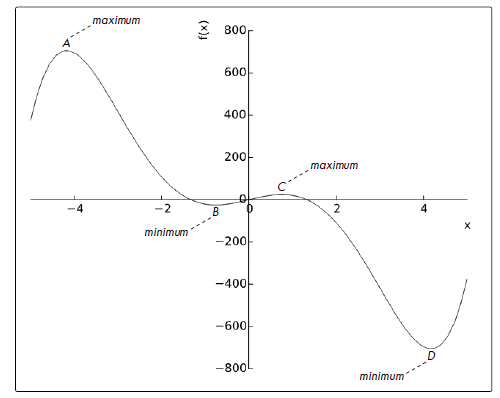

In [ ]:

A = critical_points[2]
B = critical_points[0]
C = critical_points[1]
D = critical_points[3]

Now, we find the value of the second derivative by substituting the value of each of the critical points one by one in place of  𝑥
 .

1. If the resulting value is less than  0, the point is a local maximum;
2. if the value is greater than  0, it’s a local minimum.
3. If the resulting value is  0
 , then the test is inconclusive and we cannot deduce anything about whether the critical point  𝑥
  is a local minimum, maximum, or neither.
  

In [ ]:
d2 = Derivative(f, x, 2).doit()
d2

In [ ]:
print(d2.subs({x:B}).evalf())
print(d2.subs({x:C}).evalf())
print(d2.subs({x:A}).evalf())
print(d2.subs({x:D}).evalf())

Evaluating the second derivative test at the critical points tells us that the points  𝐴
  and  𝐶
  are local maxima and the points  𝐵
  and  𝐷
  are local minima.

The global maximum and minimum of  𝑓(𝑥) on the interval  [−5,5]
is attained either at a critical point  𝑥
  or at one of the endpoints of the domain ( 𝑥=−5
and  𝑥=5
 ). We have already found all of the critical points, which are the points  𝐴
 ,  𝐵
 ,  𝐶
 , and  𝐷
 . The function cannot attain its global minimum at either of the critical points  𝐴
  or  𝐶
  because they are local maximums. By similar logic, the function cannot attain its global maximum at  𝐵
  or  𝐷
 .
Thus, to find the global maximum, we must compute the value of  𝑓(𝑥)

  at the points  𝐴
 ,  𝐶
 ,  −5
 , and  5
 . Among these points, the place where  𝑓(𝑥) has the largest value must be the global maximum.

We will create two labels, x_min and x_max, to refer to the domain boundaries and evaluate the function at the points  𝐴
 ,  𝐶
 , x_min, and x_max:

In [ ]:
x_min = -5
x_max = 5
print(f.subs({x:A}).evalf())
print(f.subs({x:C}).evalf())
print(f.subs({x:x_min}).evalf())
print(f.subs({x:x_max}).evalf())

By these calculations, as well as by examining the function value at all the critical points and the domain boundaries (Figure above), we see that thepoint  𝐴
  turns out be the global maximum.

Similarly, to determine the global minimum, we must compute the values of  𝑓(𝑥)
  at the points  𝐵
 ,  𝐷
 ,  −5
 , and  5
 :

In [ ]:
print(f.subs({x:B}).evalf())
print(f.subs({x:D}).evalf())
print(f.subs({x:x_min}).evalf())
print(f.subs({x:x_max}).evalf())



# **Support Vector Machines**

SVM offers very high accuracy compared to other classifiers such as logistic regression, and decision trees. It is known for its kernel trick to handle nonlinear input spaces. It is used in a variety of applications such as face detection, intrusion detection, classification of emails, news articles and web pages, classification of genes, and handwriting recognition.

SVM is an exciting algorithm and the concepts are relatively simple. The classifier separates data points using a hyperplane with the largest amount of margin. That's why an SVM classifier is also known as a discriminative classifier. SVM finds an optimal hyperplane which helps in classifying new data points.

Generally, Support Vector Machines is considered to be a classification approach, but it can be employed in both types of classification and regression problems. It can easily handle multiple continuous and categorical variables. SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes

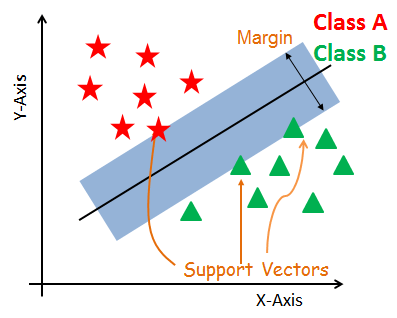


**Support Vectors**

Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

**Hyperplane**

A hyperplane is a decision plane which separates between a set of objects having different class memberships.

**Margin**

A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.

Classification using SVM

In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()

# print the names of the 13 features
print("Features: ", cancer.feature_names)

# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test


# **Build the model**

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

# **Exercise:**

1. Compute confusion matrix for the predicted results. Hint, use sklearn  metrics.ConfusionMatrixDisplay()

2. Kernel: The main function of the kernel is to transform the given dataset input data into the required form. There are various types of functions such as linear, polynomial, and radial basis function (RBF). Polynomial and RBF are useful for non-linear hyperplane. Polynomial and RBF kernels compute the separation line in the higher dimension. In some of the applications, it is suggested to use a more complex kernel to separate the classes that are curved or nonlinear. This transformation can lead to more accurate classifiers.


3. Gamma: A lower value of Gamma will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset, which causes over-fitting. In other words, you can say a low value of gamma considers only nearby points in calculating the separation line, while the a value of gamma considers all the data points in the calculation of the separation line.

4. Train SVM for your choice of dataset.


Visit [official guide](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for more informaiton

In [ ]:
# Q1:
ConfusionMatrix = metrics.confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = ConfusionMatrix, display_labels=clf.classes_)
disp.plot()
plt.show()


# **Lab 3**

# **Random Forest**

Random forests are a popular supervised machine learning algorithm.

*  Random forests are for supervised machine learning, where there is a labeled target variable.
* Random forests can be used for solving regression (numeric target variable) and classification (categorical target variable) problems.
* Random forests are an ensemble method, meaning they combine predictions from other models.
*  Each of the smaller models in the random forest ensemble is a decision tree.


In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline


In [ ]:
data = '/content/drive/MyDrive/Colab Notebooks/MADIS_Machine_Learning_Workshop/Datasets_new/car_evaluation.csv'   #import data
df = pd.read_csv(data, header=None)
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'] # rename column names


df.columns = col_names

col_names
df.head() #print first 5 samples from the data. Try df.info() and df.descirbe for information and stats about the data

In [ ]:
df.isnull().sum() # check missing values in variables

In [ ]:
# Declare feature vector and target variable

X = df.drop(['class'], axis=1)

y = df['class']

In [ ]:
list(X.columns)

In [ ]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# check the shape of X_train and X_test

X_train.shape, X_test.shape

In [ ]:
# encode categorical variables with ordinal encoding

import category_encoders as ce # pip install category_encoders

encoder = ce.OrdinalEncoder(cols=X.columns)

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier

rfc = RandomForestClassifier(n_estimators=10, random_state=0)

# fit the model

rfc.fit(X_train, y_train)

# Predict the Test set results

y_pred = rfc.predict(X_test)

# Check accuracy score

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Here, I have build the Random Forest Classifier model with default parameter of n_estimators = 10. So, I have used 10 decision-trees to build the model. Now, I will increase the number of decision-trees and see its effect on accuracy.

In [ ]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Find important features with Random Forest model

Until now, we have used all the features given in the model. Now, we will select only the important features, build the model using these features and see its effect on accuracy.

First, we will create the Random Forest model as follows:

In [ ]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

In [ ]:
import matplotlib.pyplot as plt


feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores.plot.bar(feature_scores)


**Exercise**

Train a RF using the 4 most important features from the features importance plot.



In [ ]:
# four most important features are 'buying', 'maint', 'safety', 'persons', we then
# need to drop the rest from X_train
X_train_reduced = X_train.drop(['lug_boot','doors'], axis=1)
y_train_reduced = y_train
X_test_reduced = X_test.drop(['lug_boot','doors'], axis=1)
y_test_reduced = y_test

rfc_100_reduced = RandomForestClassifier(n_estimators=7, random_state=0)


# fit the model to the training set

rfc_100_reduced.fit(X_train_reduced, y_train_reduced)

# Predict on the test set results

y_pred_100_reduced = rfc_100_reduced.predict(X_test_reduced)

# Check accuracy score

print('Model accuracy score with 7 decision-trees : {0:0.4f}'. format(accuracy_score(y_test_reduced, y_pred_100_reduced)))

## Comparing behaviour
- Model accuracy all data score with 100 decision-trees : 0.9457

- Model accuracy all data score with 10 decision-trees : 0.9457

- Model accuracy dropped data score with 100 decision-trees : 0.8494

- Model accuracy dropped data score with 10 decision-trees : 0.8546

- Model accuracy dropped data score with 7 decision-trees : 0.8581

# **K-means**
K-means is an unsupervised learning method for clustering data points. The algorithm iteratively divides data points into K clusters by minimizing the variance in each cluster.
It works as follow:

First, each data point is randomly assigned to one of the K clusters. Then, we compute the centroid (functionally the center) of each cluster, and reassign each data point to the cluster with the closest centroid. We repeat this process until the cluster assignments for each data point are no longer changing.

K-means clustering requires us to select K, the number of clusters we want to group the data into. The elbow method lets us graph the inertia (a distance-based metric) and visualize the point at which it starts decreasing linearly. This point is referred to as the "eblow" and is a good estimate for the best value for K based on our data.

In [ ]:
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
print('The elbow method shows that 2 is a good value for K, so we retrain and visualize the result:')

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
## Load Data
dfa = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MADIS_Machine_Learning_Workshop/Datasets_new/Mall_Customers.csv")
dfa = dfa[['Age','Annual Income (k$)']]
print('Total Row : ', len(dfa))
data = dfa
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
print('The elbow method shows that 3 is a good value for K, so we retrain and visualize the result:')

Download data [here](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

In [ ]:
## Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Feature Scaling
sc_dfa = StandardScaler()
dfa_std = sc_dfa.fit_transform(dfa.astype(float))
## Clustering with KMeans
# kmeans = KMeans(n_clusters=3, random_state=42).fit(dfa_std)
chosen_clusters = 3
kmeans = KMeans(n_clusters = chosen_clusters, random_state=42).fit(dfa_std)
labels = kmeans.labels_
new_dfa = pd.DataFrame(data = dfa_std, columns = ['Age','Annual Income (k$)'])
new_dfa['label_kmeans'] = labels
fig, ax = plt.subplots(figsize=(10,7))
# for cluster in range(chosen_clusters):
  # plt.scatter(new_dfa["Annual Income (k$)"][new_dfa["label_kmeans"] == cluster], new_dfa["Age"][new_dfa["label_kmeans"] == cluster],
  #           color = "blue", s=100, edgecolor='green',linestyle='--')

plt.scatter(new_dfa["Annual Income (k$)"][new_dfa["label_kmeans"] == 0], new_dfa["Age"][new_dfa["label_kmeans"] == 0],
            color = "blue", s=100, edgecolor='red',linestyle='--')
plt.scatter(new_dfa["Annual Income (k$)"][new_dfa["label_kmeans"] == 1], new_dfa["Age"][new_dfa["label_kmeans"] == 1],
            color = "red", s=100, edgecolor='green',linestyle='--')
plt.scatter(new_dfa["Annual Income (k$)"][new_dfa["label_kmeans"] == 2], new_dfa["Age"][new_dfa["label_kmeans"] == 2],
            color = "green", s=100, edgecolor='red',linestyle='--')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500);
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Age')
plt.show()

# **Lab 4**

# **K-Means with PCA**

Download the data [here](https://www.kaggle.com/datasets/cdc/national-health-and-nutrition-examination-survey?resource=download)


# **Step 1:**

First, we will find the optimal number of components which capture the greatest amount of variance in the data. In my case, as seen in Fig. 1 below, that number is three.

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'
# Load in the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MADIS_Machine_Learning_Workshop/Datasets_new/demographic.csv')
df=df.fillna(0) # i fill NaN values with 0 you can fill with your choice and see the difference
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(df)
# Create a PCA instance: pca
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.title('fig. 1')
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

In [ ]:
df.head()

Fig. above shows that the first two components explain the majority of the variance in our data. For this visualization use case, we will quickly plot just the first two. We do this to notice if there are any clear clusters

In [ ]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('fig. 2')

In [ ]:
plt.scatter(PCA_components[0], PCA_components[2], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 3')
plt.title('fig. 2.2')

I can still see that there is 2 clusters with the first and the third principal components.

In [ ]:
plt.scatter(PCA_components[1], PCA_components[2], alpha=.1, color='black')
plt.xlabel('PCA 2')
plt.ylabel('PCA 3')
plt.title('fig. 2.3')

I can still see that there is 2 clusters with the second and the third principal components.

## Partial Conclusion

Figure above shows at least two distinguishable clusters. This factoid tells us that the observations in the dataset can be grouped. Because each observation in the data is a diet, lab, and physical exam for one person, we could say that the clusters represent different groups of people. It’s important to note that we do not have a target variable by which to label these groups, so we do not know exactly what these labels are. In a utopian situation, this type of analysis would let us see the sample population segregated by health condition. Figure does not show all the meaningful principal components, however. To visualize the rest of the reduced dataset with much greater granularity, we will use k-means clustering.

# **Step 2: Find the Clusters**

In this step, we will use k-means clustering to view the top three PCA components. To do this, we will first fit these principal components to the k-means algorithm and determine the best number of clusters. Determining the ideal number of clusters for our k-means model can be done by measuring the sum of the squared distances to the nearest cluster center aka inertia. Much like the scree plot in fig. 1 for PCA, the k-means screen plot below indicates the percentage of variance explained, but in slightly different terms, as a function of the number of clusters.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.title('fig. 3')
plt.show()

Fig. 3 shows that after 4 clusters (at the elbow), the change in the value of inertia is no longer significant, and most likely, neither is the variance of the rest of the data after the elbow point. Therefore we can discard everything after k=4 and proceed to the last step in the process.


## Applying the deduced characteristic : only 4 componenets

In [ ]:
model = KMeans(n_clusters=3)
model.fit(PCA_components.iloc[:,:3]) # Taking the first 3,
# other method would be to set a certain threshold and take every component that has a value that is higher than the pre-set threshold


In [ ]:
df.head()

In [ ]:
## Clustering with KMeans
labels = model.labels_
new_df = pd.DataFrame(data = PCA_components.iloc[:,:3], columns=[0,1])
new_df['label_kmeans'] = labels
fig, ax = plt.subplots(figsize=(10,7))
# for cluster in range(chosen_clusters):
  # plt.scatter(new_dfa["Annual Income (k$)"][new_dfa["label_kmeans"] == cluster], new_dfa["Age"][new_dfa["label_kmeans"] == cluster],
  #           color = "blue", s=100, edgecolor='green',linestyle='--')

plt.scatter(new_df[0][new_df["label_kmeans"] == 0], new_df[1][new_df["label_kmeans"] == 0],
            color = "blue", s=100, edgecolor='red',linestyle='--')
plt.scatter(new_df[0][new_df["label_kmeans"] == 1], new_df[1][new_df["label_kmeans"] == 1],
            color = "red", s=100, edgecolor='green',linestyle='--')
plt.scatter(new_df[0][new_df["label_kmeans"] == 2], new_df[1][new_df["label_kmeans"] == 2],
            color = "green", s=100, edgecolor='red',linestyle='--')
plt.scatter(new_df[0][new_df["label_kmeans"] == 3], new_df[1][new_df["label_kmeans"] == 3],
            color = "black", s=100, edgecolor='red',linestyle='--')
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='white', s=300);
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Age')
plt.show()

## kmeans ++
Just like K-Means itself, K-Means++ too is a very simple algorithm.

1. The first centroid is selected randomly.

2. Calculate the Euclidean distance between the centroid and every other data point in the dataset. The point farthest away will become our next centroid.

3. Create clusters around these centroids by associating every point with its nearest centroid.

4. The point which has the farthest distance from its centroid will be our next centroid.

5. Repeat steps 3 and 4 until n number of centroids are located.

In [ ]:
import numpy as np

In [ ]:
model2 = KMeans(n_clusters=4, init='k-means++')
model2.fit(PCA_components.iloc[:,:3])

# Lab 5

# **Neural Networks**

Multi-layer Perceptron (MLP) is a supervised learning algorithm that learns a function $ f(.):\mathbb{R}^{m} → \mathbb{R}^{o}$
 by training on a dataset, where ***m***
 is the number of dimensions for input and ***o***
 is the number of dimensions for output. Given a set of features $X=x_1,x_2, …, x_M$
 and a target $y$
, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. Figure below shows a one hidden layer MLP with scalar output.

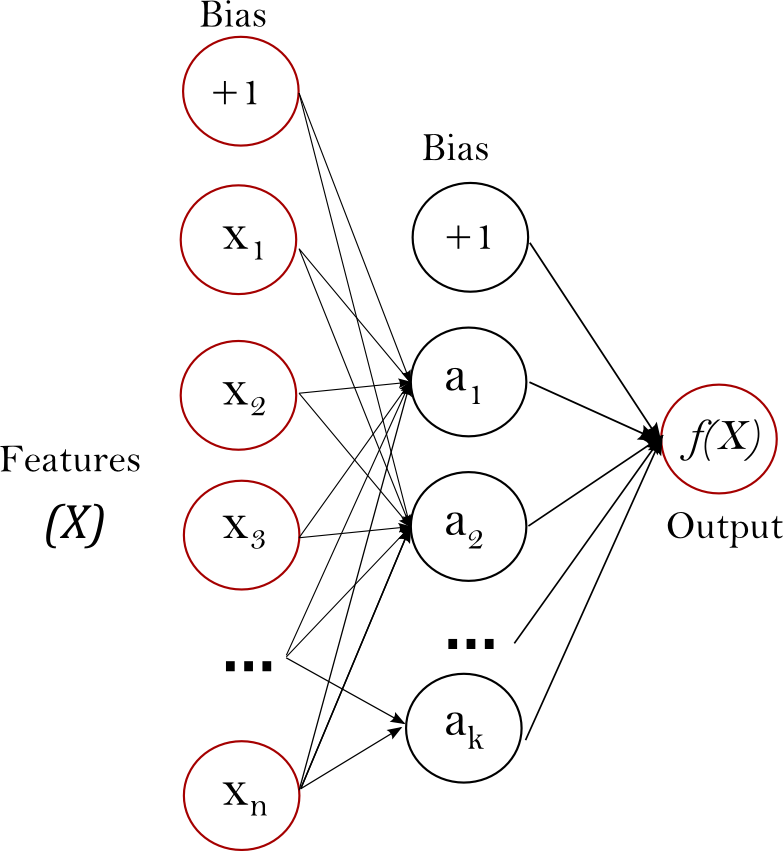

In [ ]:
# Example using Sk-Learn
#Loading the Required Libraries and Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, ConfusionMatrixDisplay
from math import sqrt
from sklearn.metrics import r2_score

#Reading the Data and Performing Basic Data Checks of the diabetese dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MADIS_Machine_Learning_Workshop/Datasets_new/diabetes.csv')
print(df.shape)
df.describe().transpose()

In [ ]:
# Creating Arrays for the Features and the Response Variable
target_column = ['Outcome']
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe().transpose()

In [ ]:
# Creating the Training and Test Datasets

X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

In [ ]:
%%time
# Building, Predicting, and Evaluating the Neural Network Model

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [ ]:
mlp.classes_

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
cm = confusion_matrix(y_train,predict_train, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=mlp.classes_)
disp.plot()

print(classification_report(y_train,predict_train))

The next step is to evaluate the performance of the model on the test data that is done with the lines of code below.



In [ ]:
print(confusion_matrix(y_test,predict_test))
cm_test = confusion_matrix(y_test,predict_test, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                               display_labels=mlp.classes_)
disp.plot()
print(classification_report(y_test,predict_test))

it is  not very good in testing, it confuses the H1 labels

# **Building a Neural Network from Scratch**

In [ ]:
#Data loading and pre-processing

from keras.datasets import mnist # figures
import keras

# Setup train and test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28

In [ ]:
# Flatten the images
image_vector_size = 28*28 # (x_train.shape)[1]*(x_train.shape)[2]
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

# Setup train and test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Training label shape: ", y_train.shape) # (60000,) -- 60000 numbers (all 0-9)
print("First 5 training labels: ", y_train[:5]) # [5, 0, 4, 1, 9]

# Convert to "one-hot" vectors using the to_categorical function, coding in an output in binary vector
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])


image_size = 784 # 28*28
num_classes = 10 # ten unique digits
x_train=x_train.reshape(x_train.shape[0],28*28) # change each 28*28 image into a single array of size 784
x_test=x_test.reshape(x_test.shape[0],28*28)

In [ ]:
from keras.layers import Dense, Dropout # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/
from tensorflow.keras.optimizers import SGD, Adam

# Design the neural network
model = Sequential()
# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units=32, activation='relu', input_shape=(image_size,)))
model.add(Dense(units=64, activation='sigmoid', input_shape=(32,)))
model.add(Dense(units=num_classes, activation='softmax')) # multiclass
# model.add(Dropout(0.1))
model.summary()

## Interpretation of the studied case
we have:
- 10 numbers that we are trying to classify using their image
- Neural Network doesn't have 2D format, so we flatten the input into one vector
- a photo is 28x28 pixels, meaning that the vector will be 784 pixels

There are no features that are being extracted, the raw data that is the pixels is used.

So in short, the NN is learning a sequence of pixels to determine what is the number.

Given that we have a multiclass, then
- the output must be softmax in order to distinguish the results
- We have only one hypothesis at the output, so we code them into binary classes with only one byte.
Given that the output is binary,
- we need to remap the data accordingly, so we must use a function that maps the data to [0,1] => this is the sigmoid.
- Adding hidden layers means that there are still some dependencies between the modified data that has not been yet represented.
- Adding neurones means that there are still some dependencies between the current data that has not yet been represented.
- Adding dropouts means that there are some data that are not dependent to each other, and therefore no neurone must connect them. They must be removed to have a shallower network, decreasing its compexity.

In [ ]:
sgd = SGD(learning_rate=0.01, momentum=0.09)
# adam = Adam(learning_rate=0.001)

model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=.1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

## Result interpretation
- If the validation and the Training curve become closer, augment the number of epochs to observe what happens
- if the validation curve is higher than the training curve, this means that the model is overfitted. Needs Dropout.
- if the difference between the validation and training curve remains constent after a certain number of epochs, decrease epochs and look for other parameters to optimize.
- Change the momentum and Learning rate till we have in the epochs the loss decreasing not increasing nor constant.


# Exercise:

1. Increase the accuracy by addinng more layer in the neural network, increasing training epochs, change batch-size, and change learning rate.
2. Change the dataset to CIFAR10 and try to increase the accuracy by addinng more layer in the neural network
3. Use SVM for the same dataset and compare the results


In [ ]:
from keras.layers import Dense, Dropout # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/
from tensorflow.keras.optimizers import SGD, Adam

# Design the neural network
model = Sequential()
# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units=32, activation='relu', input_shape=(image_size,)))
model.add(Dense(units=64, activation='relu', input_shape=(32,)))
model.add(Dense(units=64, activation='relu', input_shape=(64,)))
model.add(Dense(units=64, activation='relu', input_shape=(64,)))
model.add(Dense(units=64, activation='relu', input_shape=(64,)))
model.add(Dense(units=num_classes, activation='softmax')) # multiclass
# model.add(Dropout(0.1))
model.summary()

In [ ]:
sgd = SGD(learning_rate=0.003, momentum=0.09)
# adam = Adam(learning_rate=0.001)

model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=.1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [ ]:
#Data loading and pre-processing

from keras.datasets import cifar10 # figures
import keras

# Setup train and test splits
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28

In [ ]:
x_train[3]

In [ ]:
# Flatten the images
image_vector_size = 32*32*3 # (x_train.shape)[1]*(x_train.shape)[2]
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

# Setup train and test splits
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("Training label shape: ", y_train.shape) # (60000,) -- 60000 numbers (all 0-9)
print("First 5 training labels: ", y_train[:5]) # [5, 0, 4, 1, 9]

# Convert to "one-hot" vectors using the to_categorical function, coding in an output in binary vector
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])


In [ ]:
image_size = 32*32*3
num_classes = 10 # ten unique classes
x_train=x_train.reshape(x_train.shape[0],32*32*3) # change each (32,32,3) image into a single array of size 32*32*3
x_test=x_test.reshape(x_test.shape[0],32*32*3)

In [ ]:
# Design the neural network
model1 = Sequential()
# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model1.add(Dense(units=32, activation='relu', input_shape=(image_size,)))
model1.add(Dense(units=64, activation='relu', input_shape=(32,)))
model1.add(Dense(units=64, activation='relu', input_shape=(64,)))
model1.add(Dense(units=64, activation='relu', input_shape=(64,)))
model1.add(Dense(units=64, activation='relu', input_shape=(64,)))
model1.add(Dense(units=64, activation='relu', input_shape=(64,)))
model1.add(Dense(units=64, activation='relu', input_shape=(64,)))
model1.add(Dense(units=64, activation='relu', input_shape=(64,)))
model1.add(Dense(units=num_classes, activation='softmax')) # multiclass
# model.add(Dropout(0.1))
model1.summary()

In [ ]:
sgd = SGD(learning_rate=0.0003, momentum=0.09)
adam = Adam(learning_rate=0.0001)

model1.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
history = model1.fit(x_train, y_train, batch_size=512, epochs=50, verbose=1, validation_split=.1)
loss, accuracy  = model1.evaluate(x_test, y_test, verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

## SVM
Using SVM to resolve the problem:
Find the hyperplanes that can distinguish the 10 classes that I have in my dataset.
I only have a series of pixel luminosity

In [ ]:
%%time
from sklearn import svm
import numpy as np
from keras.optimizers import SGD

from keras.datasets import cifar10 # figures

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

import cv2
# greyscale
x_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_train])
x_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_test])
# normalize
x_train  = x_train/255
x_test  = x_test/255
# flatten
image_size = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0],image_size) # change each 32x32 image into a single array of size 1024
x_test = x_test.reshape(x_test.shape[0],image_size)

In [ ]:
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)

## Random Forest

In [ ]:
%%time
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier

rfc = RandomForestClassifier(random_state=0)

# fit the model

rfc.fit(x_train, y_train)

# Predict the Test set results

y_pred = rfc.predict(x_test)

# Check accuracy score

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Stayed 8 minutes without giving a result

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

y_pred = clf.predict(x_test)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

# **Lab 6**

# **Deep Neural Networks**
A neural network with deph( distance form source to sink more then 2 is called deep neural network)

**Example: Convolutional Neural Networks**
Like other types of neural networks, CNNs consume numerical data.

Therefore, the images fed to these networks must be converted to a numerical representation. Since images are made up of pixels, they are converted into a numerical form that is passed to the CNN.

However, as we will discuss in the upcoming section, how differetn layers work. Figure below shows a CNN architecture.

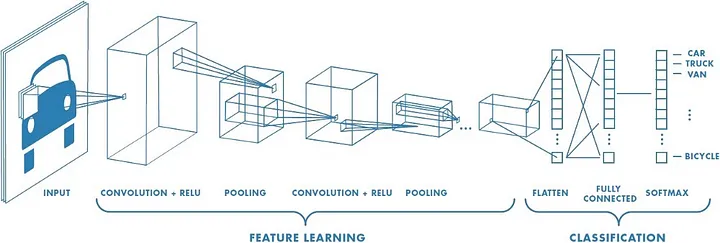

 To understand how this works, let’s look at some of the steps involved in training a CNN.

**Convolution Layer**

Reducing the size of the numerical representation sent to the CNN is done via the convolution operation. This process is vital so that only features that are important in classifying an image are sent to the neural network. Apart from improving the accuracy of the network, this also ensures that minimal compute resources are used in training the network.

The result of the convolution operation is referred to as a feature map, convolved feature, or activation map. Applying a feature detector is what leads to a feature map. The feature detector is also known by other names such as kernel or filter.

The kernel is usually a 3 by 3 matrix. Performing an element-wise multiplication of the kernel with the input image and summing the values, outputs the feature map. This is done by sliding the kernel on the input image. The sliding happens in steps known as strides. The strides and the size of the kernel can be set manually when creating the CNN.
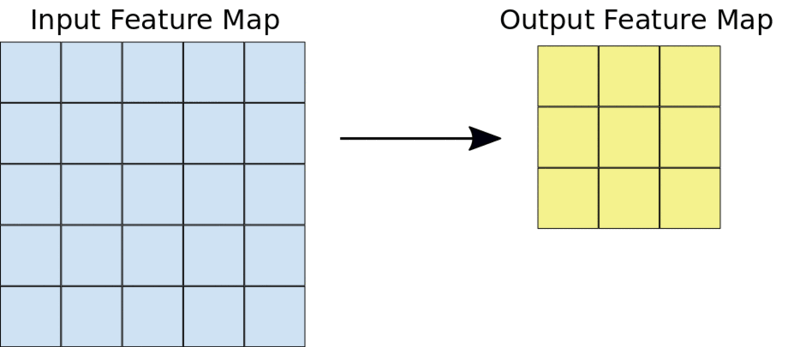

**Pooling Layer**

In this operation, the size of the feature map is reduced further. There are various pooling methods.
A common technique is max-pooling. The size of the pooling filter is usually a 2 by 2 matrix. In max-pooling, the 2 by 2 filter slides over the feature map and picks the largest value in a given box. This operation results in a pooled feature map

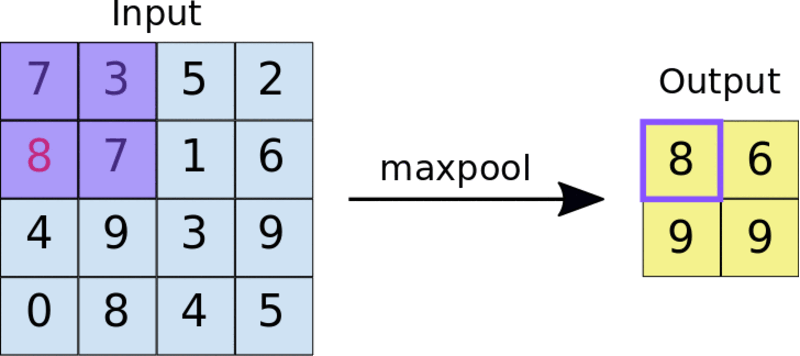

In [ ]:
import tensorflow as tf
# import train and test mnist data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


import matplotlib.pyplot as plt
%matplotlib inline
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

# When we run the code above, we will get the greyscale visualization of the RGB codes as shown below.

In [ ]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

In [ ]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [ ]:
# have a look at the summary of model

model.summary()

In [ ]:
#compile and train the model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

- `categorical_crossentropy (cce)` produces a one-hot array containing the probable match for each category,
- `sparse_categorical_crossentropy (scce)` produces a category index of the most likely matching category.

Use sparse categorical crossentropy when your classes are mutually exclusive (e.g. when each sample belongs exactly to one class) and categorical crossentropy when one sample can have multiple classes or labels are soft probabilities (like [0.5, 0.3, 0.2]).

In [ ]:
#evaluate the model using the test data
model.evaluate(x_test, y_test)

We achieved 98.5% accuracy with such a basic model. To be frank, in many image classification cases (e.g. for autonomous cars), we cannot even tolerate 0.1% error since, as an analogy, it will cause 1 accident in 1000 cases. However, for our first model, I would say the result is still pretty good. We can also make individual predictions with the following code:

In [ ]:
image_index = 5685
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')   #select the image at given index and show
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1)) # adding batch_size and predicting results
print('The predicted Value for the image index is |{}|'.format(pred.argmax()))

# Exercise:

1. Increase the accuracy by addinng more convolutional layer(s) in the neural network, change the kernel size, increasing training epochs, change batch-size, and change learning rate.
2. Change the dataset to CIFAR10 and try to increase the accuracy above 78 %.

3. Create a 1D-CNN and compare the accuracy with 2D-CNN.

4. Explore the idea of transfer learning. You can find some information [here](https://keras.io/guides/transfer_learning/)
5. Follow the Tutorial [here](https://towardsdatascience.com/time-series-prediction-with-lstm-in-tensorflow-42104db39340) for time-series prediction using LSTMs.


In [ ]:
import tensorflow as tf
# import train and test cifar10 data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


import matplotlib.pyplot as plt
%matplotlib inline
image_index = 697
print(y_train[image_index])
plt.imshow(x_train[image_index])
print(x_train.shape)

# When we run the code above, we will get the greyscale visualization of the RGB codes as shown below.

In [ ]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)
input_shape = (32, 32, 3)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

In [ ]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

model.summary()

In [ ]:
#compile and train the model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=15)

In [ ]:
#evaluate the model using the test data
model.evaluate(x_test, y_test)

## Transfer Learning
[Transfer learning & fine-tuning guide](https://keras.io/guides/transfer_learning/)

**Transfer learning** consists of taking features learned on one problem, and leveraging them on a new, similar problem. For instance, features from a model that has learned to identify racoons may be useful to kick-start a model meant to identify tanukis.

The most common incarnation of transfer learning in the context of deep learning is the following workflow:

1. Take layers from a previously trained model.
2. Freeze them, so as to avoid destroying any of the information they contain during future training rounds.
3. Add some new, trainable layers on top of the frozen layers. They will learn to turn the old features into predictions on a new dataset.
4. Train the new layers on your dataset.

This could be applied on our cifar datase from imageNet / ResNet ... in order to fine tune the parameters.

## LSTM
[Time series forecasting](https://towardsdatascience.com/time-series-prediction-with-lstm-in-tensorflow-42104db39340)

- generate a synthetic time series
- divide the series into X and y appropriately
- structure a neural network in Keras and Tensorflow based on bidirectional LSTMs
- train with early stopping and evaluate performance
- make predictions about the training series, validation and into the future

# **Lab 7**

# **Anomaly detection**

**Detecting Spam Emails**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')

#Importing libraries necessary for Model Building and Training
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MADIS_Machine_Learning_Workshop/Datasets_new/spam.csv')
data.head()

In [ ]:
data['label']=data['v1'].apply(lambda x:1 if x=='spam' else 0) # label the data
data.head(5)

In [ ]:
# train, test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.v2,data.label,test_size=0.25) # 75% train 25% test

#CounterVectorizer Convert the text into matrics
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vocab_size=500
oov_tok='<OOV>'
max_len=50

#preprocessing making tokens out of text
token = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
token.fit_on_texts(X_train)

word_index=token.word_index
word_index
print(len(word_index))
most_common_words = sorted(token.word_counts.items(), key=lambda x: x[1], reverse=True)
print(len(most_common_words))
for word, count in most_common_words[:500]:  # top 20 words
    print(f"{word}: {count}")

In [ ]:
padding_type='post'
truncate_type='post'

Trainning_seq = token.texts_to_sequences(X_train)
Trainning_pad = pad_sequences(Trainning_seq, maxlen=50, padding=padding_type,truncating=truncate_type)

Testing_seq=token.texts_to_sequences(X_test)
Testing_pad=pad_sequences(Testing_seq,maxlen=50,padding=padding_type,truncating=truncate_type)

#model
model=tf.keras.models.Sequential([tf.keras.layers.Embedding(vocab_size,16,input_length=50),
                                  tf.keras.layers.GlobalAveragePooling1D(),
                                  tf.keras.layers.Dense(32,activation='relu'),
                                  tf.keras.layers.Dropout(0.3),
                                  tf.keras.layers.Dense(1,activation='sigmoid')])

In [ ]:
X_train[1]

In [ ]:
print(pd.Series(data=X_train, index=[4665]))
print(Trainning_seq[0])
Trainning_pad[0]

In [ ]:
epoch=30
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss')#, patience=3)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'],optimizer='adam')
history=model.fit(Trainning_pad, y_train ,validation_data=(Testing_pad, y_test),epochs=epoch,callbacks=[early_stop],verbose=2)

In [ ]:
# test accuracy

model.evaluate(Testing_pad, y_test)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

# **Timeseries anomaly detection using an Autoencoder**

**Load the data**
We will use the Numenta Anomaly Benchmark(NAB) dataset. It provides artifical timeseries data containing labeled anomalous periods of behavior. Data are ordered, timestamped, single-valued metrics.

We will use the *art_daily_small_noise.csv* file for training and the *art_daily_jumpsup.csv* file for testing. The simplicity of this dataset allows us to demonstrate anomaly detection effectively


In [ ]:
import pandas as pd


master_url_root = "https://raw.githubusercontent.com/numenta/NAB/master/data/"

df_small_noise_url_suffix = "artificialNoAnomaly/art_daily_small_noise.csv"
df_small_noise_url = master_url_root + df_small_noise_url_suffix
df_small_noise = pd.read_csv(
    df_small_noise_url, parse_dates=True, index_col="timestamp"
)

df_daily_jumpsup_url_suffix = "artificialWithAnomaly/art_daily_jumpsup.csv"
df_daily_jumpsup_url = master_url_root + df_daily_jumpsup_url_suffix
df_daily_jumpsup = pd.read_csv(
    df_daily_jumpsup_url, parse_dates=True, index_col="timestamp"
)

In [ ]:
#Quick look at the data

print(df_small_noise.head())

print(df_daily_jumpsup.head())


**Visualize the data**
Timeseries data without anomalies
We will use the following data for training.


In [ ]:

fig, ax = plt.subplots()
df_small_noise.plot(legend=False, ax=ax)
plt.show()

**Timeseries data with anomalies**
We will use the following data for testing and see if the sudden jump up in the data is detected as an anomaly

In [ ]:
fig, ax = plt.subplots()
df_daily_jumpsup.plot(legend=False, ax=ax)
plt.show()

**Prepare training data**
Get data values from the training timeseries data file and normalize the value data. We have a value for every 5 mins for 14 days.

1. 24 * 60 / 5 = 288 timesteps per day
2. 288 * 14 = 4032 data points in total

In [ ]:
# Normalize and save the mean and std we get,
# for normalizing test data.
training_mean = df_small_noise.mean()
training_std = df_small_noise.std()
df_training_value = (df_small_noise - training_mean) / training_std
print("Number of training samples:", len(df_training_value))

Create sequences
Create sequences combining *TIME_STEPS* contiguous data values from the training data.

In [ ]:
import numpy as np

TIME_STEPS = 288

# Generated training sequences for use in the model.
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps + 1):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)


x_train = create_sequences(df_training_value.values)
print("Training input shape: ", x_train.shape)

**Build a model**
We will build a convolutional reconstruction autoencoder model. The model will take input of shape (batch_size, sequence_length, num_features) and return output of the same shape. In this case, sequence_length is 288 and num_features is 1.

In [ ]:
import keras
from keras import layers

model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

**Train the model**

Please note that we are using x_train as both the input and the target since this is a reconstruction model.

In [ ]:
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Let's plot training and validation loss to see how the training went.

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

**Detecting anomalies**
We will detect anomalies by determining how well our model can reconstruct the input data.

1. Find MAE loss on training samples.
2. Find max MAE loss value. This is the worst our model has performed trying to reconstruct a sample. We will make this the threshold for anomaly detection.
3. If the reconstruction loss for a sample is greater than this threshold value then we can infer that the model is seeing a pattern that it isn't familiar with. We will label this sample as an anomaly.

In [ ]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

**Compare recontruction**

Just for fun, let's see how our model has recontructed the first sample. This is the 288 timesteps from day 1 of our training dataset

In [ ]:
# Checking how the first sequence is learnt 288 samples, for one day
plt.plot(x_train[0])
plt.plot(x_train_pred[0])
plt.show()


Prepare test data

In [ ]:
df_test_value = (df_daily_jumpsup - training_mean) / training_std
fig, ax = plt.subplots()
df_test_value.plot(legend=False, ax=ax)
plt.show()

# Create sequences from test values.
x_test = create_sequences(df_test_value.values)
print("Test input shape: ", x_test.shape)

# Get test MAE loss.
x_test_pred = model.predict(x_test)
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
test_mae_loss = test_mae_loss.reshape((-1))

plt.hist(test_mae_loss, bins=50)
plt.xlabel("test MAE loss")
plt.ylabel("No of samples")
plt.show()

# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))

**Plot anomalies**
We now know the samples of the data which are anomalies. With this, we will find the corresponding timestamps from the original test data. We will be using the following method to do that:

Let's say time_steps = 3 and we have 10 training values. Our x_train will look like this:

* 0, 1, 2
* 1, 2, 3
* 2, 3, 4
* 3, 4, 5
* 4, 5, 6
* 5, 6, 7
* 6, 7, 8
* 7, 8, 9

All except the initial and the final time_steps-1 data values, will appear in time_steps number of samples. So, if we know that the samples [(3, 4, 5), (4, 5, 6), (5, 6, 7)] are anomalies, we can say that the data point 5 is an anomaly.

In [ ]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
anomalous_data_indices = []
for data_idx in range(TIME_STEPS - 1, len(df_test_value) - TIME_STEPS + 1):
    if np.all(anomalies[data_idx - TIME_STEPS + 1 : data_idx]):
        anomalous_data_indices.append(data_idx)

Let's overlay the anomalies on the original test data plot.

In [ ]:
df_subset = df_daily_jumpsup.iloc[anomalous_data_indices]
fig, ax = plt.subplots()
df_daily_jumpsup.plot(legend=False, ax=ax)
df_subset.plot(legend=False, ax=ax, color="r")
plt.show()

# **Exercise**

1. What would be the ideal threshold if the reconstruction error has normal distribution? Explain.

2. Use OCSVM (One class support vector machine) for anomlay detection. Use data of your choice.

3. Try anomaly detection (unsupervised like IsolationForest) using a dataset of your choice.
Hind: In this example, we generate two sets of 2-dimensional data points - normal_data consisting of 100 randomly generated points, and anomaly_data consisting of 10 points that are shifted away from the normal distribution. We then train an Isolation Forest on normal_data using the IsolationForest function from Scikit-learn.

The n_estimators parameter controls the number of trees in the forest, and the contamination parameter controls the fraction of anomalies expected in the data.

Next, we predict the labels for all data points (normal and anomaly) using the trained Isolation Forest, and plot the points with their predicted labels using plt.scatter. In this case, the anomaly points are predicted to have a label of -1, while the normal points are predicted to have a label of 1.


4. Do you know Transformers? The technology behind ChatGPT and many other state-of-the-art LLMs. [Here](https://www.kdnuggets.com/2020/10/understanding-transformers-data-science-way.html) is a quick guide about Transformers.
Try to understand how transformers work. Have a look at our [paper](https://www.sciencedirect.com/science/article/pii/S095219762300235X) which uses transformers for adaptive unsupervised anomaly detection

In [ ]:
import matplotlib.pyplot as plt

# Detect all the samples which are anomalies.
anomalies = test_mae_loss > np.mean(train_mae_loss) + 3*np.std(train_mae_loss)
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))

In [ ]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
anomalous_data_indices = []
for data_idx in range(TIME_STEPS - 1, len(df_test_value) - TIME_STEPS + 1):
    if np.all(anomalies[data_idx - TIME_STEPS + 1 : data_idx]):
        anomalous_data_indices.append(data_idx)

df_subset = df_daily_jumpsup.iloc[anomalous_data_indices]
fig, ax = plt.subplots()
df_daily_jumpsup.plot(legend=False, ax=ax)
df_subset.plot(legend=False, ax=ax, color="r")
plt.show()

1σ (μ + σ): Captures ~68% of the data (weak threshold, may miss anomalies).

2σ (μ + 2σ): Captures ~95% of the data (moderate threshold).

3σ (μ + 3σ): Captures ~99.7% of the data (strict threshold, fewer false positives).

The choice depends on the application:

For critical applications (e.g., fraud detection), use a higher threshold (e.g., 3σ) to minimize false positives.

For less critical cases, a lower threshold (e.g., 2σ) may suffice.

In [ ]:
import numpy as np
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt

# Generate normal data (2D Gaussian)
np.random.seed(55)
normal_data = np.random.randn(100, 2)  # 100 normal points
anomaly_data = np.random.randn(10, 2) + 4  # 10 anomalies

X = np.vstack([normal_data, anomaly_data])

# Train OCSVM
ocsvm = OneClassSVM(nu=0.05, kernel="rbf", gamma=0.1)
ocsvm.fit(normal_data)  # Train on normal data only

# Predict anomalies
preds = ocsvm.predict(X)  # +1 for normal, -1 for anomalies
print(preds)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=preds, cmap="coolwarm", marker="o")
plt.title("OCSVM Anomaly Detection")
plt.show()

In [ ]:
from sklearn.ensemble import IsolationForest

# Generate data
normal_data = np.random.randn(100, 2)
anomaly_data = np.random.randn(10, 2) + 4
X = np.vstack([normal_data, anomaly_data])

# Train Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)  # contamination is the expected outlier fraction
iso_forest.fit(X)

# Predict anomalies (-1 for anomalies, 1 for normal)
preds = iso_forest.predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=preds, cmap="coolwarm", marker="o")
plt.title("Isolation Forest Anomaly Detection")
plt.show()

### KMeans

In this example, we use the make_blobs function from Scikit-learn to generate a dataset with 1000 samples and 3 clusters. We then add an anomaly point to the dataset to simulate an anomaly.

Next, we train a k-means model on the data using the KMeans function from Scikit-learn. The n_clusters parameter specifies the number of clusters to form.

After training the model, we assign labels to each data point using the labels_ attribute of the k-means object. We then plot the data points with their corresponding labels.

Finally, we identify the anomaly point by checking which cluster it was assigned to using the predict method of the k-means object. If the anomaly point is assigned to a different cluster than the other points, it is considered an anomaly.

Note that this method assumes that anomalies will be isolated from the main cluster of data points, and may not be suitable for datasets with more complex anomaly patterns. Additionally, the performance of the method may depend on the choice of hyperparameters, such as the number of clusters.

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
X, y = make_blobs(n_samples=1000, centers=3, random_state=42)

# Add some anomalies to the data
anomaly = np.array([[0, 4]])
X = np.concatenate([X, anomaly], axis=0)

# Train k-means model on data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Assign labels to data points
labels = kmeans.labels_

# Plot data points and labels
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.plot(anomaly[:, 0], anomaly[:, 1], 'r*', label='faulty')
plt.legend(loc='upper right')
plt.title('Clustering-based anomaly detection')
plt.show()

# Identify anomaly points
anomaly_index = np.where(kmeans.predict(anomaly) == labels[-1])[0][0]
print(f'Anomal point: {X[anomaly_index]}')



In [ ]:
for lab in np.unique(labels):
  plt.plot(X[labels==lab,0], X[labels==lab,1],'*', label='class{}'.format(lab))
plt.plot(anomaly[:, 0], anomaly[:, 1], 'r*', label='faulty')
plt.legend(loc='upper left')

In [ ]:
# try to apply svm on the each cluster
fig, ax = plt.subplots(len(np.unique(labels)), 1, figsize=(15,15))
for class_ in np.unique(labels):
  kmeans2 = KMeans(n_clusters=2, random_state=42, init='k-means++', tol = 0.000000000000001)
  sub_data = X[labels==class_,:]
  kmeans2.fit(sub_data)
  labels2 = kmeans2.labels_
  for lab in np.unique(labels2):
    ax[class_].plot(sub_data[labels2==lab,0], sub_data[labels2==lab,1],'*', label='subclass {}.{}'.format(class_,lab))
    if np.isin(anomaly, sub_data).all(): # if faulty in the data plot it
      ax[class_].plot(anomaly[:, 0], anomaly[:, 1], 'g*', label='faulty')
    ax[class_].set_title('class {}'.format(class_))
  ax[class_].legend(loc='upper left')
# plt.plot(anomaly[:, 0], anomaly[:, 1], 'r*', label='faulty')
# plt.legend(loc='upper left')

In [ ]:
# try to apply svm on the each cluster
# fig, ax = plt.subplots(len(np.unique(labels)), 1, figsize=(15,15))
for class_ in np.unique(labels):
  kmeans2 = KMeans(n_clusters=2, random_state=1, init='k-means++', tol = 0.000000000000001)
  sub_data = X[labels==class_,:]
  if np.isin(anomaly, sub_data).all():
    kmeans2.fit(sub_data)
    labels2 = kmeans2.labels_
    # for lab in np.unique(labels2):
    plt.scatter(sub_data[:, 0], sub_data[:, 1], c=labels2)
    # plt.plot(sub_data[labels2==lab,0], sub_data[labels2==lab,1], label='subclass {}.{}'.format(class_,lab))
    plt.plot(anomaly[:, 0], anomaly[:, 1], 'r*', label='faulty')
      # plt.set_title('class {}'.format(class_))
    plt.legend(loc='upper left')
# plt.plot(anomaly[:, 0], anomaly[:, 1], 'r*', label='faulty')
# plt.legend(loc='upper left')

### GaussianMixture

In this example, we generate two sets of 2-dimensional data points - normal_data consisting of 100 randomly generated points, and anomaly_data consisting of 10 points that are shifted away from the normal distribution.

We then train a Gaussian Mixture Model on normal_data using the GaussianMixture function from Scikit-learn. The n_components parameter specifies the number of Gaussian components in the mixture, and the covariance_type parameter specifies the type of covariance matrix to use.

Next, we predict the negative log likelihood for all data points (normal and anomaly) using the trained Gaussian Mixture Model, and plot the points with their predicted labels using plt.scatter. In this case, the anomaly points are predicted to have a score below a certain threshold (-4 in this example), while the normal points are predicted to have a score above the threshold.

Note that the performance of Gaussian Mixture Models may depend on the choice of hyperparameters, and it's important to carefully tune these parameters for optimal performance on a given dataset. Additionally, the threshold used to detect anomalies may need to be adjusted depending on the specific application.

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# generate sample data
normal_data = np.random.randn(100, 2) # normal data points
anomaly_data = np.random.randn(10, 2) + 4 # anomaly data points

# train Gaussian Mixture Model on normal data
clf = GaussianMixture(n_components=1, covariance_type='full')
clf.fit(normal_data)

# predict negative log likelihood for all data points
all_data = np.vstack((normal_data, anomaly_data))
scores = clf.score_samples(all_data)

# plot data points and anomaly predictions
# plt.scatter(all_data[:, 0], all_data[:, 1], c=scores < -4, cmap='coolwarm')
# plt.colorbar()
# plt.show()

fig, ax = plt.subplots(2,1)
ax[0].scatter(all_data[:, 0], all_data[:, 1])
ax[0].set_title('predicted labels')
ax[1].scatter(normal_data[:, 0], normal_data[:, 1], label = 'normal')
ax[1].scatter(anomaly_data[:, 0], anomaly_data[:, 1], label = 'anormal')
ax[1].set_title('true labels')
ax[1].legend(loc='upper right')

## 4- Transformers
Example from [Knuggets](https://www.kdnuggets.com/2020/10/understanding-transformers-data-science-way.html)

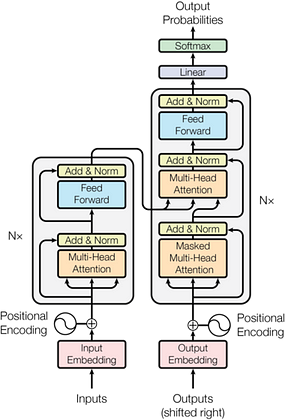

### Ex1

In [ ]:
! pip install transformers

Using transformers for anomaly detection in Python involves training a transformer-based language model on a large dataset of normal data and then using the trained model to identify anomalies in new data based on how well the data fits the model. Here are the general steps:

1. **Prepare the data:** You will need a dataset of normal data to train the transformer-based language model. You can preprocess the data by tokenizing and encoding it using a pre-trained `tokenizer`.

2. **Train the transformer-based language model:** You can use a pre-trained transformer-based language model such as `BERT` or `GPT` to train a language model on the dataset of normal data. You can train the model to predict the next word in a sequence of words using a self-supervised learning approach.

3. **Prepare the test data:** Once the model is trained, you can use it to identify anomalies in new data. You will need to tokenize and encode the test data using the same tokenizer used to preprocess the training data.

4. **Compute the anomaly score:** You can compute an anomaly score for each input sequence by comparing the model's prediction for the next word in the sequence to the actual next word. The anomaly score can be computed using a metric such as cross-entropy loss or cosine similarity.

5. **Identify anomalies:** Finally, you can identify anomalies by setting a threshold for the anomaly score. Input sequences with anomaly scores above the threshold are considered anomalies.

In [ ]:
from transformers import BertTokenizer, TFBertForMaskedLM
import tensorflow as tf

# Load the pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load the pre-trained BERT language model
model = TFBertForMaskedLM.from_pretrained('bert-base-uncased')

# Tokenize and encode the training data
train_data = ["This is a sentence.", "This is another sentence."]
train_encodings = tokenizer(train_data, padding=True, truncation=True, return_tensors='tf')

# Train the BERT language model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
# multiclass classification that is mutually exclusive
model.fit(train_encodings['input_ids'], train_encodings['input_ids'], epochs=3, batch_size=2)

In [ ]:
train_encodings.keys()

In [ ]:
# Tokenize and encode the test data
test_data = ["This is an anomalous sentence.", "This is another anomalous sentence."]
test_encodings = tokenizer(test_data, padding=True, truncation=True, return_tensors='tf')

# Compute the anomaly scores
test_scores = model.predict(test_encodings['input_ids'])

In [ ]:
test_encodings['input_ids']

In [ ]:
test_scores

In [ ]:
from tensorflow.keras.losses import sparse_categorical_crossentropy
anomaly_scores = sparse_categorical_crossentropy(test_encodings['input_ids'], test_scores)

In [ ]:
# Identify anomalies
threshold = 2.0
anomalies = [i for i, score in enumerate(anomaly_scores) if score > threshold]
print("Anomaly indices:", anomalies)

### Ex2

In [ ]:
from transformers import AutoTokenizer, AutoModel

# Load the transformer model
model_name = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Encode the data
data = ['1.0', '2.0', '3.0', '4.0', '5.0']
encoded_data = tokenizer(data, padding=True, truncation=True, return_tensors='pt')
outputs = model(**encoded_data)


## 5- Federated Learning

Federated learning Federated learning (FL) [(McMahan et al., 2017)](http://proceedings.mlr.press/v54/mcmahan17a/mcmahan17a.pdf) employs distributed clients (also called edge devices) to train a combined global model, without requiring clients to directly share local data with a central repository.

The content of the Notebook has been copied or inspired from the following sources:

* https://keras.io/examples/timeseries/timeseries_anomaly_detection/
* https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial